##
用户输出 -> 生成编辑距离为1，2 的候选词 -> 

In [8]:
# 词典库
# rstrip 用于删除字符串末尾字符（默认为空格字符）
vocab = set([line.rstrip() for line in open('vocab.txt')])

list(vocab)[:6]

['transformer', 'allowable', 'fixers', 'twined', 'Cusa', 'bugeyed']

In [12]:
# 生成候选词集合

def generate_candidates(word):
    """
    word: 给定输入（错误的输入）
    返回所有的候选集合

    生成编辑距离为1的单词
    1.insert 2. delete 3. replace
    appl: replace: bppl, cppl, aapl, abpl... 
          insert: bappl, cappl, abppl, acppl....
          delete: ppl, apl, app
    """

    # 假设使用26个字符
    letters = 'abcdefghijklmnopqrstuvwxyz'

    # EX 'apple': [('', 'apple'), ('a', 'pple'), ('ap', 'ple'), ('app', 'le'), ('appl', 'e'), ('apple', '')]
    splits = [(word[:i], word[i:]) for i in range(len(word)+1)]

    # Insert 操作
    inserts = [L+c+R for L, R in splits for c in letters]

    # Delete 操作
    deletes = [L+R[1:] for L,R in splits if R]

    # Replace 操作
    replaces = [L+c+R[1:] for L,R in splits if R for c in letters]

    canadidates = set(inserts + deletes + replaces)

    return [word for word in canadidates if word in vocab]

generate_candidates("apple")

['ample', 'apples', 'apple', 'apply']

## 构建语言模型
基本思想：统计语料库中相邻词对出现的概率

In [6]:
from nltk import bigrams
from nltk.probability import FreqDist
from nltk.corpus import reuters
import random


# 使用nltk库中的语料库
corpus = reuters.words()

# # 生成 bigrams 
bi_grams = list(bigrams(corpus))
# bi_grams[:5]


# 统计 bigram 出现频率
bigrams_count = FreqDist(bi_grams)

bigrams_count



FreqDist({(',', '000'): 10266, ("'", 's'): 9220, ('lt', ';'): 8693, ('&', 'lt'): 8688, ('.', 'The'): 8530, ('said', '.'): 7888, ('of', 'the'): 6803, ('in', 'the'): 6487, ('U', '.'): 6350, ('.', 'S'): 5833, ...})

In [4]:
# 对于正确的字符串，有多少概率写成 word 的形式（这里通过 spell-error 概率统计得到）
channel_prob = {}

for line in open('spell-errors.txt'):
    items = line.split(":")

    # 正确的字符串
    correct = items[0].strip()

    # 错误的字符串
    mistakes = [item.strip() for item in items[1].strip().split(",")]
    channel_prob[correct] = {}
    for mis in mistakes:
        channel_prob[correct][mis] = 1.0 / len(mistakes)

channel_prob

{'raining': {'rainning': 0.5, 'raning': 0.5},
 'writings': {'writtings': 1.0},
 'disparagingly': {'disparingly': 1.0},
 'yellow': {'yello': 1.0},
 'four': {'forer': 0.2,
  'fours': 0.2,
  'fuore': 0.2,
  'fore*5': 0.2,
  'for*4': 0.2},
 'woods': {'woodes': 1.0},
 'hanging': {'haing': 1.0},
 'aggression': {'agression': 1.0},
 'looking': {'loking': 0.1,
  'begining': 0.1,
  'luing': 0.1,
  'look*2': 0.1,
  'locking': 0.1,
  'lucking': 0.1,
  'louk': 0.1,
  'looing': 0.1,
  'lookin': 0.1,
  'liking': 0.1},
 'eligible': {'eligble': 0.3333333333333333,
  'elegable': 0.3333333333333333,
  'eligable': 0.3333333333333333},
 'electricity': {'electrisity': 0.3333333333333333,
  'electricty*2': 0.3333333333333333,
  'electrizity': 0.3333333333333333},
 'scold': {'schold': 0.5, 'skold': 0.5},
 'adaptable': {'adabtable': 1.0},
 'caned': {'canned': 0.5, 'cained': 0.5},
 'immature': {'imature': 1.0},
 "shouldn't": {'shoudln': 0.5, 'shouldnt': 0.5},
 'swivel': {'swival': 1.0},
 'appropriation': {'apro

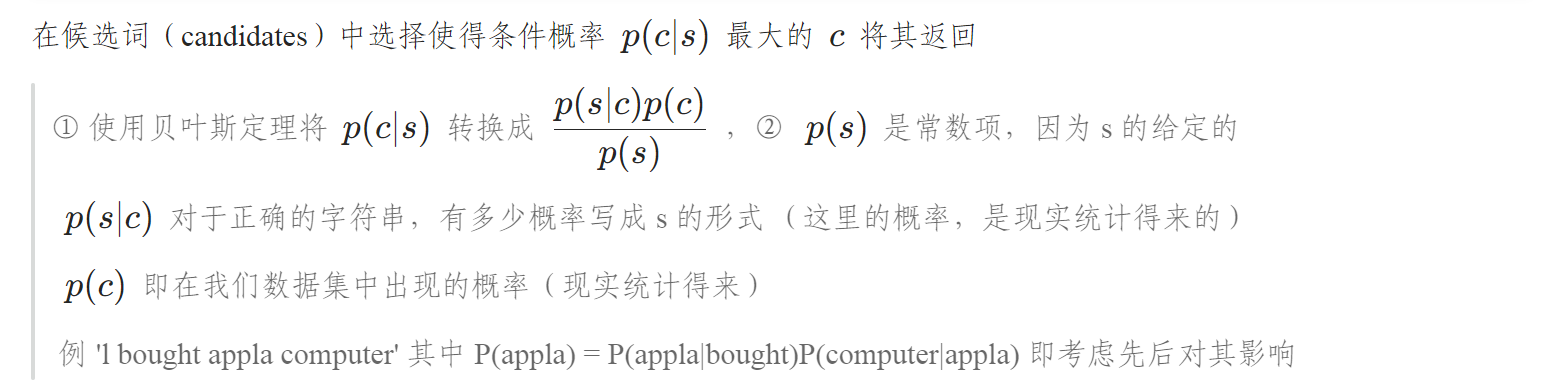

In [16]:

import numpy as np

file = open("testdata.txt", 'r')
for line in file:
    items = line.rstrip.split('\t')
    line = items[2].split()

    for word in line:
        if word not in vocab:
            # 生成 word 的候选集合
            candidtes = generate_candidates(word)
            if len(candidtes) < 1: continue

            probs = []

            # 对于每个candidate，计算它的score
            # score = p(correct)*p(mistake|correct)
            #       = log p(correct)+log p(mistake|correct)
            for candi in candidtes:
                prob = 0
                # a.计算 p(mistake|correct)
                # 如果候选词在 P(S|C) 中且 当前词在 P(S|C) 中
                if candi in channel_prob and word in channel_prob[candi]:
                    # 取其 P(S|C) 概率
                    prob += np.log(channel_prob[candi][word])
                else:
                    prob += np.log(0.0001)

                # b.计算语言模型的概率
                idx = items[2].index(word)+1
                if items[2][idx - 1] in bigrams_count and candi in bigram_cout
                    




相邻词对 (Bigrams): [('This', 'is'), ('is', 'a'), ('a', 'sample'), ('sample', 'corpus'), ('corpus', 'for'), ('for', 'bigrams')]
